In [1]:
import pandas as pd 
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

#THIS DATA IS ABOUT THE AUTO CAR INSURANCE FRAUD ,WE NEED TO PREDICT THE FRAUD 


df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info() # THE DATA IS A MIX OF FLOAT ,IT AND OBJECT, WITH NULL VALUES PRESENT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()   # JUST ONE COLUMN HAS ALL THE NULL VALUES ,WE WILL TREAT IT 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# DROP THE C39 COLUMN AS ALL THE NULL VALUES ARE PRESENT 

df.drop('_c39',inplace=True,axis=1)

In [8]:
#WILL DROP AUTO_MODEL AS WE HAVE AUTO_MAKE, WE WILL ALSO DROP INJURY CLAIM,VEHICLE CLAIM,PROPERTY CLAIM AS THESE 3 ARE THE SUM 
# OF TOTAL CLAIM 

df.drop(['auto_model','injury_claim','property_claim','vehicle_claim'],inplace=True,axis=1)

In [9]:
df.head()   # CHECKING THE DATA 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,Saab,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,Mercedes,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,Dodge,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,Chevrolet,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,Accura,2009,N


In [10]:
# WE WILL DROP POLICY NUMBER AS WELL AS THIS IS NOT USEFULL INFORMATION AS FAR AS THE MODEL IS CONCERN 


df.drop(['policy_number','insured_hobbies','collision_type'],axis=1,inplace=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

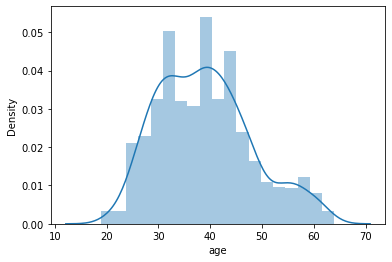

In [11]:

# CHECKING THE DISTRIBUTION OF DATA 

sns.distplot(df['age'])    # MAJOURITY OF PEOPLE ARE FROM 30 TO 40 

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

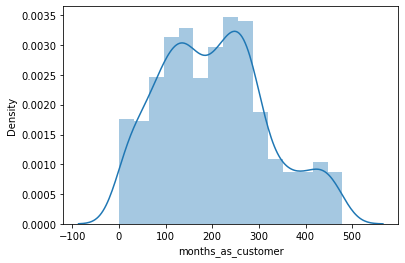

In [12]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

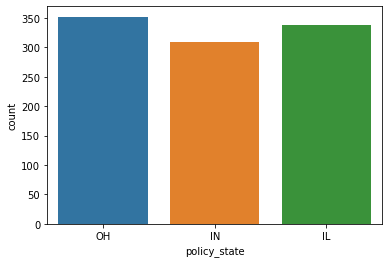

In [13]:
#COUNTPLOT 

sns.countplot(data=df,x='policy_state')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

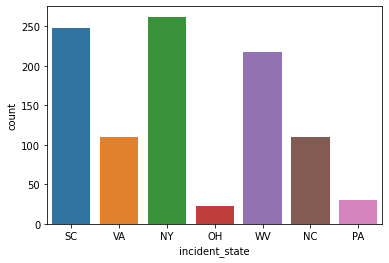

In [14]:
sns.countplot(data=df,x='incident_state')  #MOST CLAIMS ARE IN NEW YORK 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

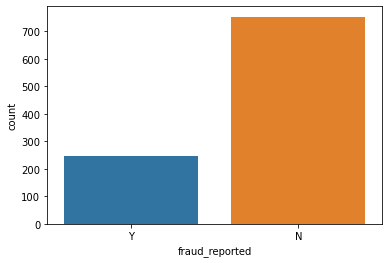

In [15]:
sns.countplot(data=df,x='fraud_reported') # MOST OF THE CLAIMS ARE NOT REPORTED FRAUD 

<AxesSubplot:xlabel='incident_state', ylabel='count'>

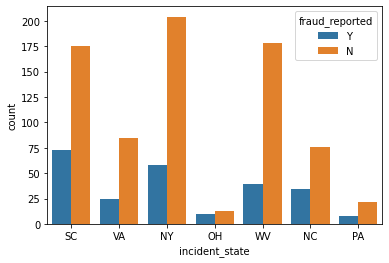

In [16]:
sns.countplot(data=df,x='incident_state',hue='fraud_reported')

# MOST OF THE FRAUDS REPORTED IN SOUTH CAROLINA 
#PA AND OH HAS THE LEAST NUMBER OF FRAUD REPORTED 

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

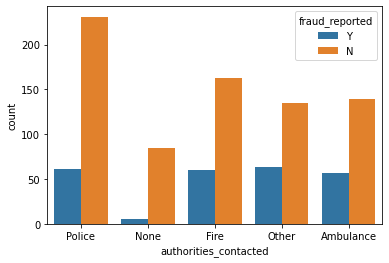

In [17]:
sns.countplot(data=df,x='authorities_contacted',hue='fraud_reported')

#THIS SHOWS PEOPLE WHO DO FRAUD ALSO THEY REPORT AUTHORITIES 

In [18]:
# THERE IS ALOT OF DIFFRENT UNITS IN THIS DATA ,SO WE WILL HAVE TO DO PLENTY OF EDA ,WE WILL START WITH POLICY_BIND DATE 
#INCIDENT DATE ,WE WILL CHANGE THEM TO DATETIME 



df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

# I AM GOING TO TRY TO REDUCE FEATURES ,SO WILL CREATE A NEW COLUMN,THIS SUBTRACTION WILL GIVE US POLICY CLAIM DAYS 
# WE CAN USE THIS FOR MODEL 

df['policy_clain_day']=(df.incident_date-df.policy_bind_date).dt.days

In [19]:
# NOW AS WE HAVE MADE A NEW COLUMN SO WE WILL DROP 

df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
#AGE VALUE COUNTS 

print(df['age'].value_counts)
print(df['age'].min())
print(df['age'].max())

<bound method IndexOpsMixin.value_counts of 0      48
1      42
2      29
3      41
4      44
       ..
995    38
996    41
997    34
998    62
999    60
Name: age, Length: 1000, dtype: int64>
19
64


In [21]:
# SO WE CAN MAKE GROUPS OF AGE TO SIMPLYFY THE DATA FOR RHE MODEL 

bin_labels = ['18-22', '23-27', '28-32', '33-37','38-42','43-47','48-52','53-57','58-62','63-67']
bins = [19,24,29,34,39,44,49,54,59,64,69]
df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)


In [22]:
# CHECKING THE VALUE COUNTS ,MIN AND MAX VALUES TO MAKE THE BINS ACCORDINGLY 

print(df['months_as_customer'].value_counts)
print(df['months_as_customer'].min())
print(df['months_as_customer'].max())

<bound method IndexOpsMixin.value_counts of 0      328
1      228
2      134
3      256
4      228
      ... 
995      3
996    285
997    130
998    458
999    456
Name: months_as_customer, Length: 1000, dtype: int64>
0
479


In [23]:
bins_labels=['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
df['months_as_customer_groups']=pd.cut(df['months_as_customer'],bins=bins,labels=bin_labels,include_lowest=True)

In [24]:
print(df['policy_annual_premium'].value_counts)
print(df['policy_annual_premium'].min())
print(df['policy_annual_premium'].max())

<bound method IndexOpsMixin.value_counts of 0      1406.91
1      1197.22
2      1413.14
3      1415.74
4      1583.91
        ...   
995    1310.80
996    1436.79
997    1383.49
998    1356.92
999     766.19
Name: policy_annual_premium, Length: 1000, dtype: float64>
433.33
2047.59


In [25]:
# WE WILL USE LINSPACE HERE AS THE VALUES ARE VARIED FROM 433.33 TO 2047.59

In [26]:
# policy_anual _premium
bins =list(np.linspace(0,2100,5,dtype= int))
bins_labels=['regular','premium','gold','platinum']
df['policy_premium_groups']=pd.cut(df['policy_annual_premium'],bins=bins,labels=bins_labels)

In [27]:
# POLICY_DEDUCTABLE

print(df['policy_deductable'].value_counts)
print(df['policy_deductable'].min())
print(df['policy_deductable'].max())


<bound method IndexOpsMixin.value_counts of 0      1000
1      2000
2      2000
3      2000
4      1000
       ... 
995    1000
996    1000
997     500
998    2000
999    1000
Name: policy_deductable, Length: 1000, dtype: int64>
500
2000


In [28]:
bins_labels=['500-1000','1001-1500','1501-2000']
bins = [500,1000,1500,2000]
df['policy_deductable_group']=pd.cut(df['policy_deductable'],bins=bins,labels=bins_labels,include_lowest=True)

In [29]:
#WE WILL DROP 4 COULUMNS AS WE HAVE MADE A BREAK DOWN OF THEM 

df.drop(['months_as_customer','age','policy_deductable','policy_annual_premium'],axis=1,inplace=True)

In [30]:
df.head()

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported,policy_clain_day,age_group,months_as_customer_groups,policy_premium_groups,policy_deductable_group
0,OH,250/500,0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,Saab,2004,Y,100,43-47,48-52,gold,500-1000
1,IN,250/500,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,Mercedes,2007,Y,3130,38-42,38-42,gold,1501-2000
2,OH,100/300,5000000,430632,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,Dodge,2007,N,5371,23-27,28-32,gold,1501-2000
3,IL,250/500,6000000,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,Chevrolet,2014,Y,9260,38-42,43-47,gold,1501-2000
4,IL,500/1000,6000000,610706,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,Accura,2009,N,256,38-42,38-42,platinum,500-1000


In [31]:
# LABEL ENCODE THE TARGET VARIABLE 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

<AxesSubplot:>

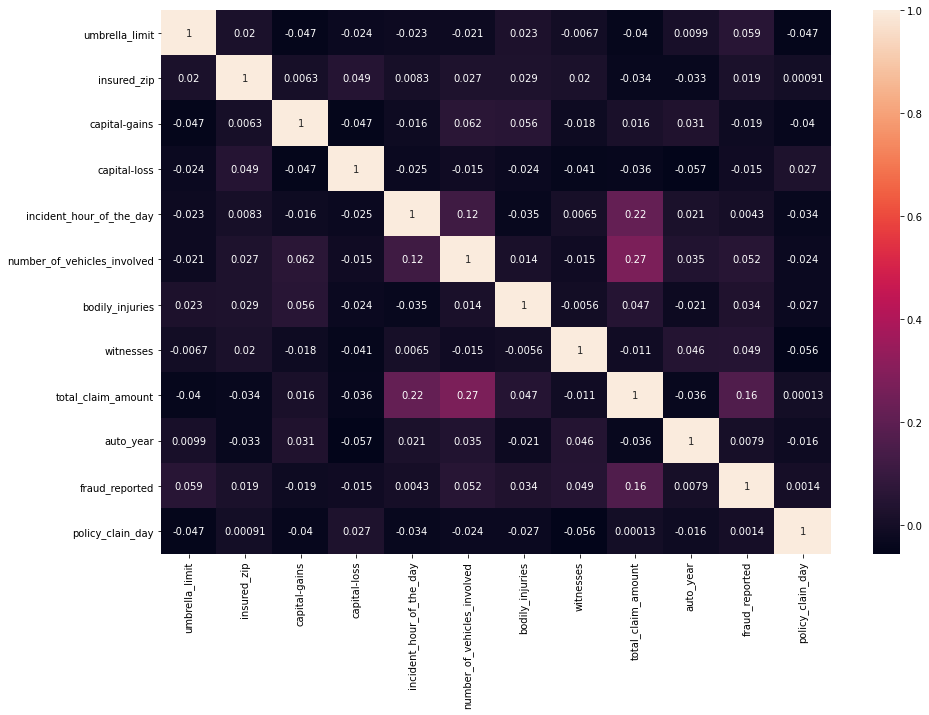

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [35]:
# LABEL ENCODE THE CATEGORICAL  DATA

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()




cols = df.columns


df[cols] = df[cols].apply(LabelEncoder().fit_transform)



df.head()





,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported,policy_clain_day,age_group,months_as_customer_groups,policy_premium_groups,policy_deductable_group
0,2,1,1,486,1,4,2,0,187,353,2,0,4,4,1,996,5,0,2,1,2,2,563,10,9,1,6,5,6,0,1
1,1,1,5,519,1,4,6,2,0,353,3,1,4,5,5,628,8,0,0,0,0,0,44,8,12,1,302,4,4,0,0
2,2,0,5,6,0,6,11,3,63,353,0,1,4,1,1,685,7,2,1,2,3,1,143,4,12,0,535,1,2,0,0
3,0,1,6,812,0,6,1,4,153,98,2,0,4,2,0,669,5,0,0,1,2,1,451,3,19,1,943,4,5,0,0
4,0,2,6,850,1,0,11,4,265,211,3,1,2,1,0,220,20,0,1,0,1,1,81,0,14,0,24,4,4,1,1


In [36]:
df.shape

(1000, 31)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

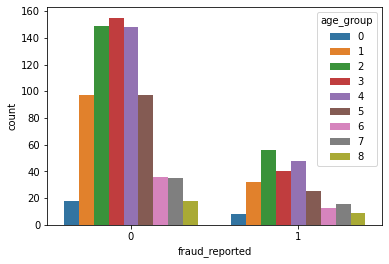

In [39]:
sns.countplot(x=df['fraud_reported'],hue='age_group',data=df)
#MOST FRAUDS ARE REPORTED AGAINST THE AGE GROUP OF 28 TO 32

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

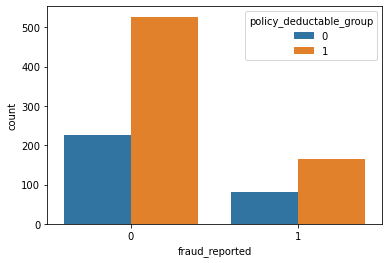

In [40]:
sns.countplot(x=df['fraud_reported'],hue='policy_deductable_group',data=df)

# 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

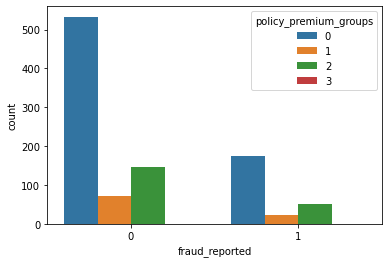

In [41]:
sns.countplot(x=df['fraud_reported'],hue='policy_premium_groups',data=df)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

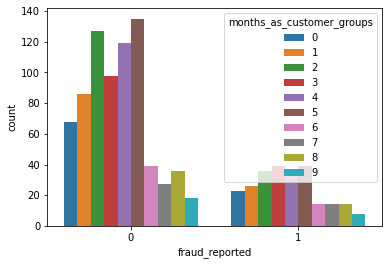

In [42]:
sns.countplot(x=df['fraud_reported'],hue='months_as_customer_groups',data=df)


In [43]:
# dividing the data into dependent and independent 


x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=.25)


In [46]:
# applying standard scaler to make the data balance as it has values in diffrent units 


from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train,x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [47]:
# applying logistic regression 


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [50]:
score_lr=lr.score(x_train,y_train)
score_lr

0.8026666666666666

In [51]:
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

74.8
[[172  13]
 [ 50  15]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       185
           1       0.54      0.23      0.32        65

    accuracy                           0.75       250
   macro avg       0.66      0.58      0.58       250
weighted avg       0.71      0.75      0.71       250



In [52]:
# applying the cross validation

from sklearn.model_selection import cross_val_score


score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.745 0.725 0.725 0.78  0.775]
0.7499999999999999
0.023664319132398484


In [53]:
#  applying random forest classifier


from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc=RandomForestClassifier()

In [55]:
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,pred))

77.60000000000001
[[177   8]
 [ 48  17]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       185
           1       0.54      0.23      0.32        65

    accuracy                           0.75       250
   macro avg       0.66      0.58      0.58       250
weighted avg       0.71      0.75      0.71       250



In [57]:
# applying the cross validation

from sklearn.model_selection import cross_val_score


score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77  0.77  0.755 0.775 0.78 ]
0.7699999999999999
0.008366600265340762


In [58]:
#APPLYING DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc=DecisionTreeClassifier()

In [60]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
dtcp=dtc.predict(x_test)
print(accuracy_score(y_test,dtcp)*100)
print(confusion_matrix(y_test,dtcp))
print(classification_report(y_test,dtcp))

64.4
[[137  48]
 [ 41  24]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       185
           1       0.33      0.37      0.35        65

    accuracy                           0.64       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.66      0.64      0.65       250



In [62]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79  0.73  0.74  0.725 0.77 ]
0.751
0.024979991993593614


In [64]:
# SAVING THE BEST MODEL 

#THE BEST MODEL IS RANDOM FOREST 

import  pickle as pk
file=open('INSURANCE_FRAUD.pkl','wb')
pk.dump(rfc,file)

# *CONCLUSION